<h1 style="text-align:center; color:#2E86C1;">📊 Data Analysis</h1>

___

# Purchase & Sales Data Analysis
## Vendor Performance, Store Profitability & Inventory Risk

**Author:** Lokesh Bansal  
**Tools:** Python (Pandas, Matplotlib), SQL, Power BI  


## Project Context

This notebook analyzes retail purchase and sales transactions to evaluate vendor performance, store profitability, and inventory efficiency.
The data represents the flow of goods from vendors to stores and then to customers.

The analysis focuses on identifying:
- High-performing and high-risk vendors
- Profitability patterns across stores
- Inventory inefficiencies such as deadstock


## Data Source & Pipeline

- Two CSV datasets were used:
  - Purchase data (vendors supplying goods to stores)
  - Sales data (stores selling goods to customers)

- The CSV files were first loaded into a relational database.
- Data was queried from the database and loaded into Pandas DataFrames.
- All data transformations and analysis were performed using Python.
- Final analytical outputs were visualized using Power BI.


## Business Questions

This analysis aims to answer the following business questions:

### Vendor Analysis
- Which vendors contribute most to total sales and profit?
- Which vendors have long delivery lead times?
- Which vendors pose operational risk due to cost, lead time, or low profitability?

### Store Analysis
- What is the relationship between sales and profit at store level?
- Which stores generate high sales and total profit?
- Which stores accumulate the highest deadstock?

### Inventory Analysis
- Which brands and stores contribute most to deadstock?
- Where are inventory planning inefficiencies occurring?


___

**Ingestion scrpit from excel files to database**

```python
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename="logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a")

engine = create_engine('sqlite:///inventory.db') 

def ingest_db(df, table_name, engine):
    df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)

def load_data():
    start = time.time()
    for file in os.listdir():
        if '.csv' in file:
            df = pd.read_csv(file)
            logging.info(f"Ingesting {file} in db")
            ingest_db(df, file[:-4], engine)
    end = time.time()
    total_time = (end - start)/60
    logging.info('---------------Ingestion complete-------------')
    logging.info(f"Total time taken: {total_time} minutes")

if __name__=="__main__":
    load_data()
```

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
conn = sqlite3.connect('inventory.db')

In [3]:
pd.read_sql_query("SELECT * FROM SQLITE_MASTER where type='table'",conn)

,type,name,tbl_name,rootpage,sql
0,table,purchases,purchases,2,"CREATE TABLE purchases (\n\t""InventoryId"" TEXT..."
1,table,sales,sales,93483,"CREATE TABLE sales (\n\t""InventoryId"" TEXT, \n..."


In [4]:
df_purchase = pd.read_sql_query("Select * from purchases",conn)

In [5]:
df_purchase.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


In [6]:
df_purchase.shape

(2372474, 16)

In [7]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


In [8]:
df_sales = pd.read_sql_query("SELECT * from sales",conn)

In [9]:
df_sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [10]:
df_sales.shape

(12825363, 14)

In [11]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825363 entries, 0 to 12825362
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   SalesQuantity   int64  
 6   SalesDollars    float64
 7   SalesPrice      float64
 8   SalesDate       object 
 9   Volume          float64
 10  Classification  int64  
 11  ExciseTax       float64
 12  VendorNo        int64  
 13  VendorName      object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.3+ GB


# Vendor Analysis

In [12]:
df_purchase['VendorName'].nunique()

129

## Top 20 vendors by Total Sales

In [13]:
df_purchase.groupby(['VendorName']).agg({"Quantity":['sum','mean','count'],"Dollars":['sum','mean']}).reset_index().sort_values(('Dollars','sum'),ascending=False).head(20)

VendorName Quantity                         Dollars  \
                                      sum       mean   count          sum   
28   DIAGEO NORTH AMERICA INC     5459788  22.438161  243326  50959796.85   
63         MARTIGNETTI COMPANIES  2637275  14.943169  176487  27821473.91   
50   JIM BEAM BRANDS COMPANY      2737165  14.418881  189832  24203151.05   
75   PERNOD RICARD USA            1647558  15.310170  107612  24124091.56   
8    BACARDI USA INC              1427075  15.537694   91846  17624378.72   
23   CONSTELLATION BRANDS INC     2325892  12.533501  185574  15573917.90   
14   BROWN-FORMAN CORP            1006122  16.902512   59525  13529433.08   
115  ULTRA BEVERAGE COMPANY LLP   1077527  12.822512   84034  13210613.93   
33   E & J GALLO WINERY           1858260  11.430733  162567  12289608.09   
59   M S WALKER INC               1372841  12.171439  112792  10935817.30   
86   SAZERAC CO INC               1417727  15.374981   92210   9916770.26   
68   MOET HENNESSY USA INC         427867  14.547362   29412   9472995.20   
81   PROXIMO SPIRITS INC.          682042  12.791965   53318   7588029.90   
126  WILLIAM GRANT & SONS INC      302685  10.608615   28532   5960744.35   
74   PERFECTA WINES                553116  16.030954   34503   5665501.53   
127  WINE GROUP INC                888385   8.372618  106106   5258636.79   
17   CAMPARI AMERICA               501284  17.513940   28622   4141720.71   
95   SOUTHERN WINE & SPIRITS NE    402677  13.480082   29872   3699813.46   
101  STOLI GROUP,(USA) LLC         314035  14.321841   21927   3666478.72   
87   SAZERAC NORTH AMERICA INC.    503931   9.275202   54331   3537977.55   

                 
           mean  
28   209.430134  
63   157.640358  
50   127.497740  
75   224.176593  
8    191.890542  
23    83.922952  
14   227.289930  
115  157.205583  
33    75.597188  
59    96.955611  
86   107.545497  
68   322.079260  
81   142.316477  
126  208.914354  
74   164.203157  
127   49.560221  
17   144.704099  
95   123.855566  
101  167.212967  
87    65.118948

In [14]:
df_purchase['LeadTime'] = (pd.to_datetime(df_purchase['ReceivingDate']) - pd.to_datetime(df_purchase['PODate'])).dt.days

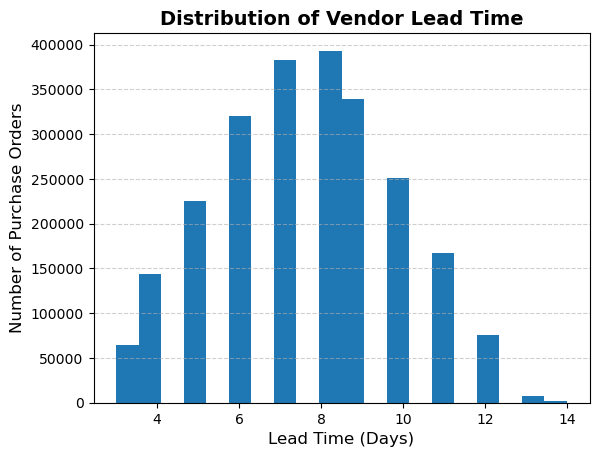

In [15]:
plt.hist(df_purchase['LeadTime'],bins=20)
plt.title('Distribution of Vendor Lead Time', fontsize=14, fontweight='bold')
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Number of Purchase Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Top 20 Vendors with Lowest Average Lead Time

In [16]:
df_purchase.groupby(['VendorName'])['LeadTime'].mean().reset_index().sort_values(by='LeadTime',ascending=True).head(20)

,VendorName,LeadTime
113,TRUETT HURST,5.000000
45,HIGHLAND WINE MERCHANTS LLC,5.321429
57,LOYAL DOG WINERY,5.950000
64,MARTIGNETTI COMPANIES,6.697279
2,ALISA CARR BEVERAGES,6.809524
25,Circa Wines,6.948498
76,PHILLIPS PRODUCTS CO.,7.012447
89,SEA HAGG DISTILLERY LLC,7.022823
70,NICHE W & S,7.069797
69,MOONLIGHT MEADERY,7.083700


In [17]:
sales_per_vendor = df_purchase.groupby(['VendorName'])['Dollars'].sum().reset_index().sort_values(by='Dollars',ascending=False).head(12)

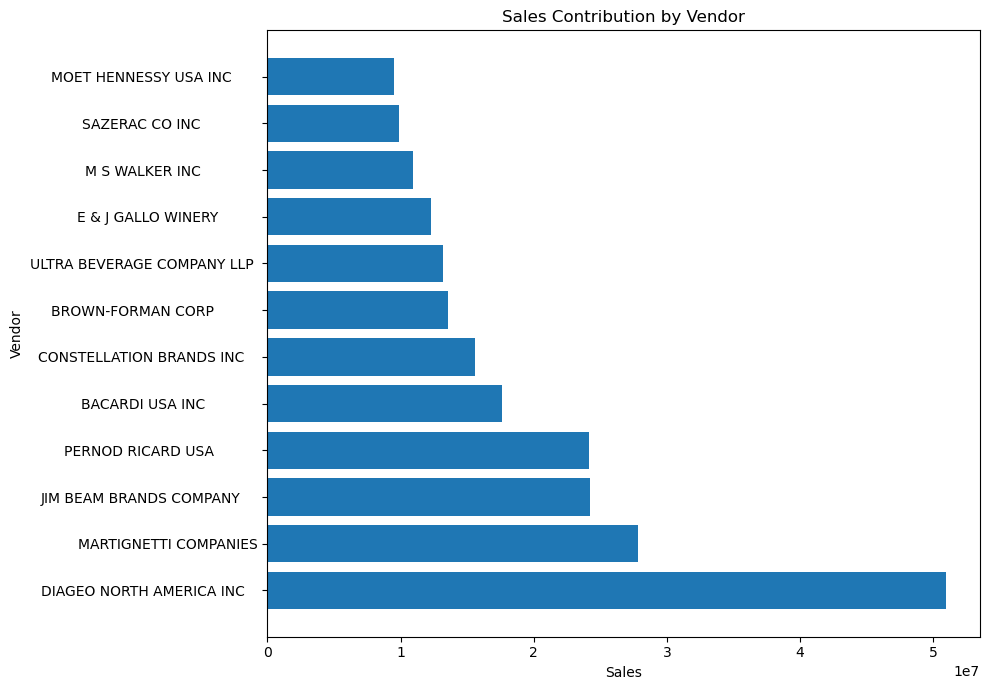

In [18]:
plt.figure(figsize=(10, 7))

plt.barh(
    sales_per_vendor['VendorName'],
    sales_per_vendor['Dollars']
)

plt.xlabel('Sales')
plt.ylabel('Vendor')
plt.title('Sales Contribution by Vendor')

plt.tight_layout()
plt.show()


> Top 12 vendors contribute approximately **71% of total sales value**, 
indicating high dependency on a small subset of vendors.

In [19]:
sales_per_vendor['Dollars'].sum()*100/df_purchase['Dollars'].sum()

71.34560474619201

## Top 20 vendors contributing the most to store profit

In [20]:
df_sales_new = pd.merge(df_sales,df_purchase[['InventoryId','PurchasePrice']].drop_duplicates(),on='InventoryId')
df_sales_new['Total_profit'] = (df_sales_new['SalesPrice'] - df_sales_new['PurchasePrice'])*df_sales_new['SalesQuantity']

In [21]:
df_sales_new.groupby(['VendorName'])['Total_profit'].sum().reset_index().sort_values(by='Total_profit',ascending=False).head(20)

,VendorName,Total_profit
27,DIAGEO NORTH AMERICA INC,18675983.75
61,MARTIGNETTI COMPANIES,13676220.52
22,CONSTELLATION BRANDS INC,9070827.26
73,PERNOD RICARD USA,8667089.96
49,JIM BEAM BRANDS COMPANY,8503916.05
7,BACARDI USA INC,7072789.27
32,E & J GALLO WINERY,6549727.52
13,BROWN-FORMAN CORP,5200554.70
113,ULTRA BEVERAGE COMPANY LLP,5192111.74
57,M S WALKER INC,4846725.15


## Problematic Vendors

### Criteria for Identifying problematic vendors

A vendor is classified as **problematic** if it meets **all** of the following conditions:
- Among the **bottom 20 vendors by total sales contribution**
- Among the **top 20 vendors with the highest average lead time**
- Among the **bottom 20 vendors by profit contribution to stores**

In [22]:
prob_vendor_sales_price = df_purchase.groupby(['VendorName'])['Dollars'].sum().reset_index().sort_values(by='Dollars',ascending=True).head(20)['VendorName']
prob_vendor_leadtime = df_purchase.groupby(['VendorName'])['LeadTime'].mean().reset_index().sort_values(by='LeadTime',ascending=False).head(20)['VendorName']
prob_vendor_store_profit = df_sales_new.groupby(['VendorName'])['Total_profit'].sum().reset_index().sort_values(by='Total_profit',ascending=True).head(20)['VendorName']

In [23]:
problematic_vendors = list(set(prob_vendor_sales_price) & set(prob_vendor_leadtime) & set(prob_vendor_store_profit))
problematic_vendors = [x.strip() for x in problematic_vendors]
problematic_vendors

['SILVER MOUNTAIN CIDERS',
 'IRA GOLDMAN AND WILLIAMS, LLP',
 'VINEDREA WINES LLC',
 'AMERICAN SPIRITS EXCHANGE',
 'UNCORKED',
 'FLAVOR ESSENCE INC',
 'STAR INDUSTRIES INC.']

**These are the problematic vendors**  
**1. SILVER MOUNTAIN CIDERS**  
**2. IRA GOLDMAN AND WILLIAMS, LLP**  
**3. VINEDREA WINES LLC**  
**4. AMERICAN SPIRITS EXCHANGE**  
**5. UNCORKED**  
**6. FLAVOR ESSENCE INC**  
**7. STAR INDUSTRIES INC**

# Store Analysis

In [24]:
df_sales_summary = df_sales_new.groupby(['Store']).agg({"SalesQuantity":["mean","sum"],"SalesDollars":["mean","sum"],"Total_profit":["mean","sum"]}).reset_index().sort_values(by=('Total_profit','sum'),ascending=False)

In [25]:
df_sales_summary

Store SalesQuantity          SalesDollars              Total_profit  \
                  mean      sum         mean          sum         mean   
75    76      3.257664  1561949    52.306721  25079451.08    16.364534   
72    73      3.044619  1355708    48.165030  21446924.76    14.982194   
33    34      3.265296  1354706    49.471728  20524830.71    14.991371   
37    38      3.130704  1311981    45.769143  19180429.05    14.366916   
65    66      2.695817  1106207    42.499595  17439368.91    13.200940   
..   ...           ...      ...          ...          ...          ...   
36    37      1.669530    82216    20.848203   1026669.78     6.367341   
79    81      2.015572    73129    25.769243    934959.66     7.639422   
28    29      1.783145    66078    18.954336    702390.83     5.961907   
25    26      1.655007    42206    20.954547    534382.86     6.301474   
2      3      1.862544    34485    22.061686    408472.12     6.736210   

                
           sum  
75  7846286.53  
72  6671271.30  
33  6219619.92  
37  6020729.20  
65  5416900.21  
..         ...  
36   313559.73  
79   277173.50  
28   220930.37  
25   160700.19  
2    124720.93  

[80 rows x 7 columns]

## Relationship between Sales and Profit for a store.

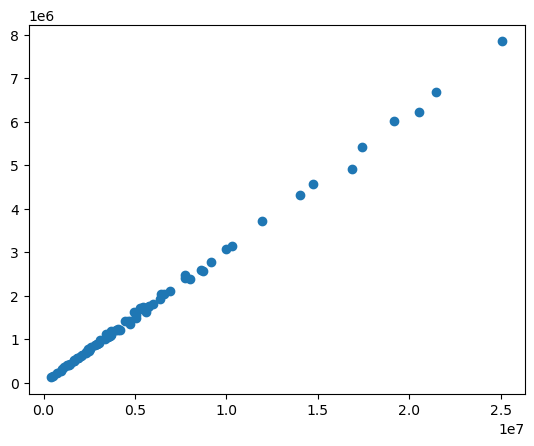

In [26]:
plt.scatter(df_sales_summary['SalesDollars']['sum'],df_sales_summary['Total_profit']['sum'])

## Top 20 Stores by Total Profit

In [27]:
df_sales_summary[['Store','Total_profit']].head(20)

Store Total_profit            
                 mean         sum
75    76    16.364534  7846286.53
72    73    14.982194  6671271.30
33    34    14.991371  6219619.92
37    38    14.366916  6020729.20
65    66    13.200940  5416900.21
49    50    14.191973  4905923.92
66    67    12.171608  4576792.43
68    69    12.646909  4310635.85
59    60    12.854580  3706656.64
14    15    11.976927  3137272.12
54    55    12.256313  3075145.64
40    41    11.323652  2767953.41
48    49    10.728979  2592915.29
73    74    11.796768  2571270.75
67    68    11.732055  2467814.22
22    23    10.151007  2403058.12
9     10    10.764090  2374838.19
32    33    10.755371  2108149.53
0      1     9.297831  2049074.49
5      6    11.055264  2030000.71

In [28]:
df_inventory_bought = df_purchase.groupby('InventoryId')['Quantity'].sum().reset_index()
df_inventory_sold= df_sales_new.groupby('InventoryId')['SalesQuantity'].sum().reset_index()
df_inventory_bought.rename(columns={'Quantity':'Bought'},inplace=True)
df_inventory_sold.rename(columns={'SalesQuantity':'Sold'},inplace=True)
df_bought_sold = pd.merge(df_inventory_bought,df_inventory_sold,on='InventoryId',how="outer")
df_bought_sold['store'] = df_bought_sold['InventoryId'].str.split("_").str[0]
df_bought_sold['brand'] = df_bought_sold['InventoryId'].str.split("_").str[2]

In [29]:
df_bought_sold.isnull().sum()

InventoryId       0
Bought            0
Sold           4906
store             0
brand             0
dtype: int64

In [30]:
df_bought_sold.fillna(value=0,inplace=True)
df_bought_sold['Available'] = df_bought_sold['Bought']  - df_bought_sold['Sold']
df_bought_sold['Available'] = df_bought_sold['Available'].apply(lambda x: 0 if x<0 else x)
df_deadstock = pd.merge(df_bought_sold, df_purchase[['InventoryId','PurchasePrice']].drop_duplicates(),on='InventoryId')
df_deadstock['TotalCost'] = df_deadstock['Available']*df_deadstock['PurchasePrice']

## Top 20 stores with the Highest deadstock

In [31]:
df_deadstock.groupby(['store'])['TotalCost'].sum().reset_index().sort_values(by='TotalCost',ascending=False).head(20)

,store,TotalCost
45,50,2491688.45
71,74,1486057.31
78,81,1084444.12
35,41,909769.76
27,34,880600.74
63,67,835205.34
70,73,826502.79
65,69,808266.90
62,66,763968.77
73,76,734548.26


## Top 20 Brands with the Highest Deadstock

In [32]:
df_deadstock.groupby(['brand'])['TotalCost'].sum().reset_index().sort_values(by='TotalCost',ascending=False).head(20)

,brand,TotalCost
6729,3102,171752.62
6237,2753,164037.28
6252,2757,129736.86
461,1233,119528.50
7125,3405,115300.68
7315,3545,82766.09
9821,6654,78744.00
688,1346,78676.95
804,1385,77423.70
7502,3650,69952.89
